In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)

In [3]:
# Load the dataset and set the column names
df = pd.read_csv('Dataset/ratings_Electronics.csv' ,names=['userId', 'productId','rating','timestamp'])

In [4]:
# Display shape
df.shape

(7824482, 4)

In [5]:
# Display columns
df.columns

Index(['userId', 'productId', 'rating', 'timestamp'], dtype='object')

The dataset contains over 7.8 million entries. 
Taking 2000000 random entries from the dataset as a sample because the dataset is too large.

In [6]:
product_data = df.sample(n=2000000, ignore_index=True)

In [7]:
# Delete the previous dataframe to release the memory
del df

In [8]:
# Display the top 5 records of the dataframe
product_data.head()

,userId,productId,rating,timestamp
0,A2CCQAOYUQ5U49,B001LK8P14,5.0,1276128000
1,A3SURXJ7B7JWME,B000WXF2Y4,4.0,1369699200
2,A3N0WN21Z90MUK,B001TCOPR2,5.0,1271980800
3,AX0CK9EXVI255,B009WVJ9VE,4.0,1370131200
4,A3CLNSX71IFFB9,B00FS4UNG4,4.0,1389139200


In [9]:
# Display information of the dataframe
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     object 
 1   productId  object 
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 61.0+ MB


In [10]:
# Delete the unnecessary timestamp column
product_data.drop('timestamp', axis=1, inplace=True)

In [11]:
# Display data description
product_data.describe()

,rating
count,2.000000e+06
mean,4.013199e+00
std,1.380103e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [12]:
# Count null values
product_data.isnull().sum()

userId       0
productId    0
rating       0
dtype: int64

In [13]:
# Count duplicated values
product_data.duplicated().sum()

0

Proceeding forward due to zero null and duplicated values

Displaying Rating Distribution as a graph

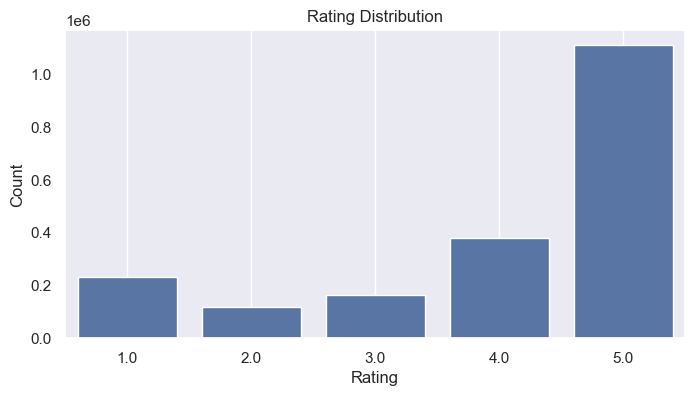

In [14]:
# Set size of the figure
plt.figure(figsize=(8,4))

# Create a count plot based on the 'rating' column
sns.countplot(x='rating',data=product_data)

# Add a title to the plot
plt.title('Rating Distribution')

# Add a label to the x-axis
plt.xlabel('Rating')

# Add a label to the y-axis
plt.ylabel('Count')

# Add a grid to the plot
plt.grid()

# Display plot
plt.show()

Analyzing the rating by user

In [15]:
print('Total rating : ',product_data.shape[0])
print('Total unique users : ',product_data['userId'].nunique())
print('Total unique products : ',product_data['productId'].nunique())

Total rating :  2000000
Total unique users :  1501400
Total unique products :  267420


In [16]:
# Count the number of rated products per user
no_of_rated_products_per_user = product_data.groupby(by='userId')['rating'].count().sort_values(ascending=False)
no_of_rated_products_per_user.head()

userId
A5JLAU2ARJ0BO     121
A3OXHLG6DIBRW8    119
A6FIAB28IS79      119
ADLVFFE4VBT8      115
A680RUE1FDO8B     102
Name: rating, dtype: int64

In [17]:
# Count the number of users who have rated more than 50 products
print('Number of users who have rated more than 50 products : {} '.format(sum(no_of_rated_products_per_user >= 50)))

Number of users who have rated more than 50 products : 64 


## Popularity Based Recommendation
To suggest products to user who just signed up

In [18]:
# Filter the products with more than 50 ratings and making a new dataframe
data = product_data.groupby('productId').filter(lambda x:x['rating'].count()>=50)

In [19]:
data.head()

,userId,productId,rating
0,A2CCQAOYUQ5U49,B001LK8P14,5.0
3,AX0CK9EXVI255,B009WVJ9VE,4.0
6,A2T4X3JDES3TF1,B0002L5R78,5.0
7,AOM8LICJ51R1,B005DIBHA6,5.0
9,A1P1QN4RJYF15B,B0036VO2B8,5.0


In [20]:
# Calculate the number of ratings per product
# Sort the results in the descending order 
no_of_rating_per_product = data.groupby('productId')['rating'].count().sort_values(ascending=False)

In [21]:
no_of_rating_per_product.head()

productId
B0074BW614    4791
B00DR0PDNE    4195
B007WTAJTO    3655
B0019EHU8G    3193
B006GWO5WK    3135
Name: rating, dtype: int64

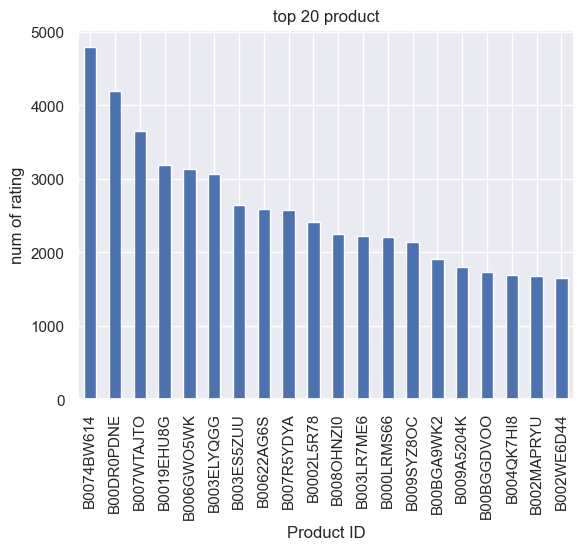

In [22]:
# Create a bar plot of the top 20 most rated products
no_of_rating_per_product.head(20).plot(kind='bar')

# Add a title to the plot
plt.title('top 20 product')

# Add label to the x-axis
plt.xlabel('Product ID')

# Add label to the x-axis
plt.ylabel('num of rating')

# Display plot
plt.show()

In [23]:
# Calculate the average rating for each product
# Create a new dataframe from that data
mean_rating_per_product = pd.DataFrame(data.groupby('productId')['rating'].mean())

In [24]:
mean_rating_per_product.head()

,rating
productId,
0972683275,4.450549
1400501466,4.070175
1400532655,3.669492
140053271X,3.908333
1400599997,3.407407


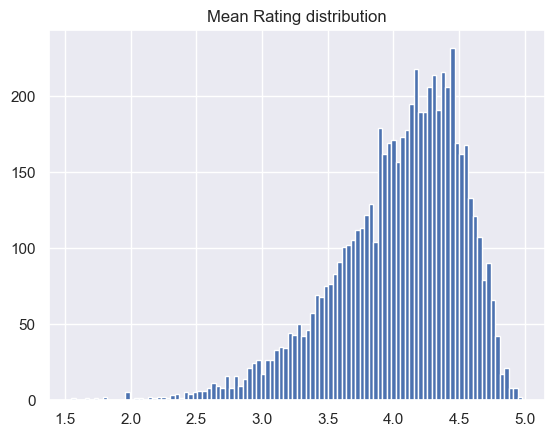

In [25]:
# Create histogram with 100 bins
plt.hist(mean_rating_per_product['rating'],bins=100)

# Add a title to the histogram 
plt.title('Mean Rating distribution')

# Display histogram
plt.show()

In [26]:
# Check the skewness of the mean rating data
mean_rating_per_product['rating'].skew()

-0.9242720534863534

Moderately negatively skewed 

In [27]:
# Add a rating_count column to the mean_rating_per_product dataframe
mean_rating_per_product['rating_counts'] = data.groupby('productId')['rating'].count()

In [28]:
mean_rating_per_product.head()

,rating,rating_counts
productId,,
0972683275,4.450549,273
1400501466,4.070175,57
1400532655,3.669492,118
140053271X,3.908333,120
1400599997,3.407407,54


In [29]:
# Find the product with the highest mean rating
mean_rating_per_product[mean_rating_per_product['rating_counts'] == mean_rating_per_product['rating_counts'].max()]

,rating,rating_counts
productId,,
B0074BW614,4.492799,4791


In [30]:
# The minimum number of ratings a product can have
min_rating_counts = mean_rating_per_product['rating_counts'].min()

# The number of products with the minimum number of ratings
total_min_rating_products = mean_rating_per_product[mean_rating_per_product['rating_counts']==min_rating_counts].shape[0]

print('Minimum rating count for a product :', min_rating_counts)
print('Total products with the minimum rating count :', total_min_rating_products)

Minimum rating count for a product : 50
Total products with the minimum rating count : 155


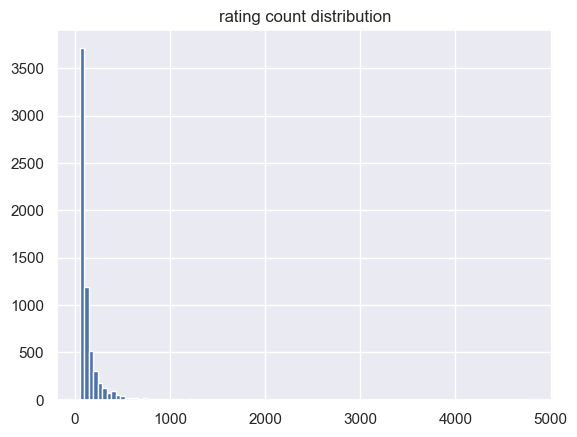

In [31]:
# Create histogram with 100 bins
plt.hist(mean_rating_per_product['rating_counts'],bins=100)

# Add a title to the histogram 
plt.title('rating count distribution')

# Display histogram
plt.show()

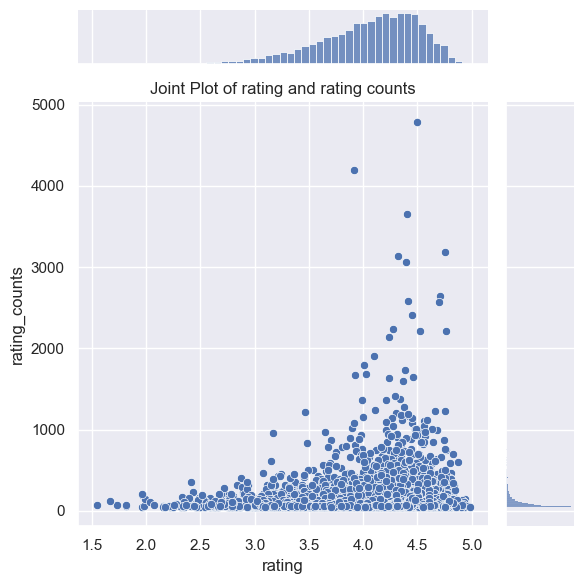

In [32]:
# Create a joint plot with x and y axes representing mean rating and rating count
sns.jointplot(x='rating',y='rating_counts',data=mean_rating_per_product)

# Add a title to the joint plot
plt.title('Joint Plot of rating and rating counts')

# Prevent subplots from overlapping
plt.tight_layout()

# Display the joint plot
plt.show()

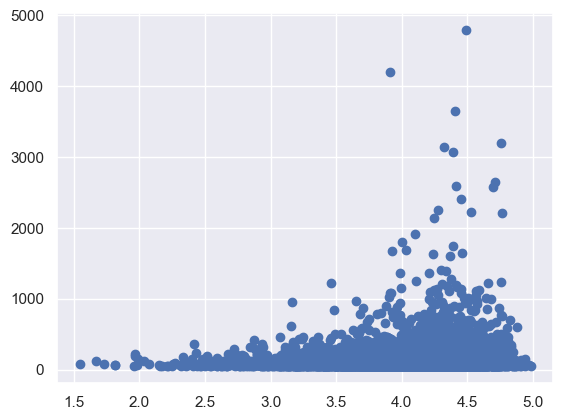

In [33]:
# Create a scatter plot with x and y axes representing mean rating and rating count
plt.scatter(x=mean_rating_per_product['rating'], y=mean_rating_per_product['rating_counts'])

# Display the scatter plot
plt.show()

In [34]:
# Calculate the Pearson correlation coefficient between mean rating and ratings count
correlation = mean_rating_per_product['rating'].corr(mean_rating_per_product['rating_counts'])
print(f'Correlation between Rating and Rating Counts is : {correlation}')

Correlation between Rating and Rating Counts is : 0.10386695460769872


Not much of a correlation

## Collaborative Filtering

In [35]:
# Import libraries for collaborative filtering approach
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

In [36]:
# Specify the rating scale of data 
reader = Reader(rating_scale=(1, 5))

# load the data from "data" into a format suitable for collaborative filtering
surprise_data = Dataset.load_from_df(data, reader)

In [37]:
#Split the surprise dataset into 80:20 ratio using train_test_split
trainSet, testSet = train_test_split(surprise_data, test_size=0.3,random_state=42)

#### Creating a collaborative filtering algorithm (KNNWithMeans) with specified parameters
k=5: Number of neighbors to consider

'name': Similarity measure (how similar two things are) to use 'pearson_baseline'

'user_based': Whether to use user-based or item-based collaborative filtering (set to False for item-based)

In [38]:
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})

# Train the collaborative filtering algorithm on the training dataset
algo.fit(trainSet)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [39]:
# Make predictions on the testing dataset and store the prediction objects in the 'test_pred' list
test_pred = algo.test(testSet)

Calculate and print the Root Mean Squared Error (RMSE) for the collaborative filtering model on the test set
###### RMSE is a metric for evaluating the accuracy of predictions

In [40]:
print("Item-based Model : Test Set")
# 'verbose=True' is set to display additional information (Print "RMSE: x")
accuracy.rmse(test_pred ,verbose=True)

Item-based Model : Test Set
RMSE: 1.3171


1.3170645007633348

#### Model-based Collaborative Filtering 

In [42]:
# Create smaller dataframe with 20000 random samples from 'data'
data2 = data.sample(20000)

# Create pivot table from the data2 DataFrame
ratings_matrix = data2.pivot_table(values='rating', index='productId', columns='userId', fill_value=0)
ratings_matrix.head()

userId,A00818852NAIGLP5KZLND,A00850438H0YYT7OD6KL,A0110255Y4ER0RTKEKXS,A01207993SNWKZOPI8D7P,A01428281H1HG7C574WL1,A0210339WPEG1DSC5KXH,A0220159ZRNBTRKLG08H,A0265288N4QKTDEE9OUD,A02751083RQ4FV21S0VFU,A02814502GJCMYT5QTC9T,...,AZYJE40XW6MFG,AZYQ60ZR354HC,AZYSLPX9HUWPW,AZYVXNAUD5JS1,AZZB6XD153BP,AZZJZQGBP0GNE,AZZNHVT9AH73R,AZZSJ1D2KEBT7,AZZYBP8LG3NQW,AZZZRS1YZ8HVP
productId,,,,,,,,,,,,,,,,,,,,,
0972683275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400501466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400532655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140053271X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00000J061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
# Decompose ratings matrix using Truncated Singular Value Decomposition (SVD)
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(ratings_matrix)
decomposed_matrix.shape

(5471, 10)

In [44]:
# Calculate the correlation matrix
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(5471, 5471)

In [45]:
# product_id_string = "B00001P4ZH"
# 
# # Make a list of index values
# product_names = list(ratings_matrix.index)
# 
# # Find the index of a particular product ID from that list
# product_id_index = product_names.index(product_id_string)
# print(product_id_index)

10


In [46]:
# Extract the row corresponding to a specific product ID from the correlation matrix
correlation_product_ID = correlation_matrix[product_id_index]
correlation_product_ID.shape

(5471,)

In [72]:
# Filter the rows of the correlation matrix with products with correlation value of more than 0.85
correlation_matrix[correlation_product_ID>0.85].shape

(130, 5471)

In [74]:
# Get the indices of the top 20 highest correlation values
top_indices = np.argsort(correlation_product_ID)[-20:][::-1]

# Create a list of 20 product IDs with the highest correlation values
top_product_ids = [product_names[i] for i in top_indices]

# Create a dictionary with product IDs as keys and their correlation values as values
correlation_dict = {product_names[i]: correlation_product_ID[i] for i in top_indices}

# Print the results
print("Correlation Dictionary:")
for product_id, correlation_value in correlation_dict.items():
    print(f"Product ID: {product_id}, Correlation Value: {correlation_value}")

Correlation Dictionary:
Product ID: B00001P4ZH, Correlation Value: 1.0
Product ID: B009EVLN7K, Correlation Value: 0.9818457500299684
Product ID: B0034JWXBI, Correlation Value: 0.9787824059176413
Product ID: B000DLB91A, Correlation Value: 0.9773978136064815
Product ID: B003EW81Q6, Correlation Value: 0.9731613752587275
Product ID: B006ZW4H4C, Correlation Value: 0.9667375859484938
Product ID: B00009UT9B, Correlation Value: 0.9534822182550861
Product ID: B002AH8T3Q, Correlation Value: 0.9492542465427146
Product ID: B005E7KMH0, Correlation Value: 0.9469148172832134
Product ID: B00021XIJW, Correlation Value: 0.9442977137392898


In [78]:
import numpy as np

def recommend_products(product_id, top_n=20, correlation_threshold=0.85):
    # Find the index of the specified product ID
    try:
        # Make a list of index values
        product_names = list(ratings_matrix.index)
        product_id_index = product_names.index(product_id)
    except ValueError:
        print(f"Product ID '{product_id}' not found in the dataset.")
        return None

    # Extract the row corresponding to the specified product ID from the correlation matrix
    correlation_product_ID = correlation_matrix[product_id_index]

    # Filter the rows of the correlation matrix with products with a correlation value above the threshold
    similar_products_indices = np.where(correlation_product_ID > correlation_threshold)[0]

    # Get the indices of the top N highest correlation values
    top_indices = np.argsort(correlation_product_ID[similar_products_indices])[-top_n:][::-1]

    # Create a list of top N product IDs with the highest correlation values
    top_product_ids = [product_names[similar_products_indices[i]] for i in top_indices]

    # Create a dictionary with product IDs as keys and their correlation values as values
    correlation_dict = {product_names[similar_products_indices[i]]: correlation_product_ID[similar_products_indices[i]] for i in top_indices}

    # Print the recommended products
    print(f"Top {top_n} Recommended Products for '{product_id}':")
    for recommended_product_id, correlation_value in correlation_dict.items():
        print(f"Product ID: {recommended_product_id}, Correlation Value: {correlation_value}")

    # return top_product_ids

# Example usage:
# Assuming product_names, correlation_matrix, and product_id_string are available from previous code
recommend_products("B00001P4ZH")


Top 20 Recommended Products for 'B00001P4ZH':
Product ID: B00001P4ZH, Correlation Value: 1.0
Product ID: B009EVLN7K, Correlation Value: 0.9818457500299684
Product ID: B0034JWXBI, Correlation Value: 0.9787824059176413
Product ID: B000DLB91A, Correlation Value: 0.9773978136064815
Product ID: B003EW81Q6, Correlation Value: 0.9731613752587275
Product ID: B006ZW4H4C, Correlation Value: 0.9667375859484938
Product ID: B00009UT9B, Correlation Value: 0.9534822182550861
Product ID: B002AH8T3Q, Correlation Value: 0.9492542465427146
Product ID: B005E7KMH0, Correlation Value: 0.9469148172832134
Product ID: B00021XIJW, Correlation Value: 0.9442977137392898
Product ID: B00BF9MUAS, Correlation Value: 0.9384234325923663
Product ID: B008CS5T76, Correlation Value: 0.9371301018133616
Product ID: B00DUKJ5CQ, Correlation Value: 0.9368344384691111
Product ID: B000JLO31M, Correlation Value: 0.9354471007361942
Product ID: B005KDY8NM, Correlation Value: 0.9350456796694389
Product ID: B00007056H, Correlation Val